In [133]:
#Importing necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import warnings

#Importing sklearn modules *    
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [134]:
#Remove warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)
sns.set_style("whitegrid")

#Inline plottinng
%matplotlib inline

#Random number generator seeding
np.random.seed(7)

In [135]:
#Importing data set

In [136]:
csv = "electronics_review_data.csv"
edata = pd.read_csv(csv)

In [137]:
#Viewing first two data in the data set

In [138]:
edata.head(2)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman


In [139]:
#Copying the dataset, describing, and obtaining information on the data

In [140]:
data = edata.copy()
data.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,34131.000000,34627.000000,0.0,0.0
mean,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,13.215775,0.735653,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,814.000000,5.000000,NaN,NaN


In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [142]:
#Display the unique ID of products

In [143]:
data["asins"].unique()

array(['B01AHB9CN2', 'B00VINDBJK', 'B005PB2T0S', 'B002Y27P3M',
       'B01AHB9CYG', 'B01AHB9C1E', 'B01J2G4VBG', 'B00ZV9PXP2',
       'B0083Q04TA', 'B018Y229OU', 'B00REQKWGA', 'B00IOYAM4I',
       'B018T075DC', nan, 'B00DU15MU4', 'B018Y225IA', 'B005PB2T2Q',
       'B018Y23MNM', 'B00OQVZDJM', 'B00IOY8XWQ', 'B00LO29KXQ',
       'B00QJDU3KY', 'B018Y22C2Y', 'B01BFIBRIE', 'B01J4ORNHU',
       'B018SZT3BK', 'B00UH4D8G2', 'B018Y22BI4', 'B00TSUGXKE',
       'B00L9EPT8O,B01E6AO69U', 'B018Y23P7K', 'B00X4WHP5E', 'B00QFQRELG',
       'B00LW9XOJM', 'B00QL1ZN3G', 'B0189XYY0Q', 'B01BH83OOM',
       'B00BFJAHF8', 'B00U3FPN4U', 'B002Y27P6Y', 'B006GWO5NE',
       'B006GWO5WK'], dtype=object)

In [144]:
#Filtering, sorting, and structuring the data set

In [145]:
print("Before {}".format(len(data)))
dataAfter = data.dropna(subset=["reviews.rating"])

# Empty values in reviews.rating removal
print("After {}".format(len(dataAfter)))
dataAfter["reviews.rating"] = dataAfter["reviews.rating"].astype(int)

Before 34660
After 34627


In [146]:
#Splitting data into training and testing data set

In [147]:
split = StratifiedShuffleSplit(n_splits=5, test_size=0.2)
for train_index, test_index in split.split(dataAfter,
                                           dataAfter["reviews.rating"]): 
    train_data = dataAfter.reindex(train_index)
    test_data = dataAfter.reindex(test_index)

In [148]:
len(train_data)

27701

In [149]:
train_data["reviews.rating"].value_counts()/len(train_data)

5.0    0.685174
4.0    0.247031
3.0    0.043500
2.0    0.011696
1.0    0.011588
Name: reviews.rating, dtype: float64

In [150]:
len(test_data)

6926

In [151]:
test_data["reviews.rating"].value_counts()/len(test_data)

5.0    0.689864
4.0    0.244730
3.0    0.042160
1.0    0.011406
2.0    0.011118
Name: reviews.rating, dtype: float64

In [152]:
#Data with review only creation

In [153]:
reviews = train_data.copy()
reviews.head(2)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
4349,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2015-11-28T00:00:00.000Z,2017-05-21T04:06:08Z,"2017-04-30T00:26:00.000Z,2017-06-07T08:10:00.000Z",...,True,NaN,5.0,5.0,http://reviews.bestbuy.com/3545/5025800/review...,we bought this for my 11 year old daughter and...,great for all ages,NaN,NaN,Mark
30776,AV1YE_muvKc47QAVgpwE,NaN,B00U3FPN4U,Amazon Fire Tv,"Back To College,College Electronics,College Tv...","848719057492,amazonfiretv/51454342,amazonfiret...",Amazon,2017-01-06T00:00:00.000Z,2017-09-20T05:35:55Z,"2017-08-25T22:21:42.763Z,2017-08-19T09:26:46.1...",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/4370400/review...,"I have the Roku 4, and new Apple TV, this stre...",Great streaming box,NaN,NaN,Techno


In [154]:
#Review analysis

In [155]:
analysis_matrix = reviews.corr()
analysis_matrix


,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
reviews.id,NaN,NaN,NaN,NaN,NaN
reviews.numHelpful,NaN,1.00000,-0.04372,NaN,NaN
reviews.rating,NaN,-0.04372,1.00000,NaN,NaN
reviews.userCity,NaN,NaN,NaN,NaN,NaN
reviews.userProvince,NaN,NaN,NaN,NaN,NaN


In [156]:
#Defining the sentiments as per rating and adding them to the data

In [157]:
def sentiments(rating):
    if (rating == 5) or (rating == 4):
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif (rating == 2) or (rating == 1):
        return "Negative"

train_data["Sentiment"] = train_data["reviews.rating"].apply(sentiments)
test_data["Sentiment"] = test_data["reviews.rating"].apply(sentiments)
train_data["Sentiment"][:20]

4349     Positive
30776    Positive
28775     Neutral
1136     Positive
17803    Positive
7336     Positive
32638    Positive
13995    Positive
6728     Negative
22009    Positive
11047    Positive
22754    Positive
5578     Positive
11673    Positive
19168    Positive
14903    Positive
30843    Positive
5440     Positive
28940    Positive
31258    Positive
Name: Sentiment, dtype: object

In [158]:
# Collecting and creating set with reviews and sentiments

In [159]:
X_train = train_data["reviews.text"]
X_train_targetSentiment = train_data["Sentiment"]
X_test = test_data["reviews.text"]
X_test_targetSentiment = test_data["Sentiment"]
print(len(X_train), len(X_test))

27701 6926


In [160]:
# Text replacement of 'nan' with ' '

In [161]:
X_train = X_train.fillna(' ')
X_test = X_test.fillna(' ')
X_train_targetSentiment = X_train_targetSentiment.fillna(' ')
X_test_targetSentiment = X_test_targetSentiment.fillna(' ')

In [162]:
#Pre processing the text and checking occurance

In [163]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train) 
X_train_counts.shape

(27701, 12526)

In [164]:
#Feature extraction and tfidf transformer

In [165]:
tfidf_transformer = TfidfTransformer(use_idf=False)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(27701, 12526)

In [166]:
#Implementation of pipeline 

In [167]:
#MULTINOMIAL NAIVE BAYES CLASSIFIER Implementation and Training

In [168]:
clf_multiNB_pipe = Pipeline([("vect", CountVectorizer()), 
                             ("tfidf", TfidfTransformer()),
                             ("clf_nominalNB", MultinomialNB())])
clf_multiNB_pipe.fit(X_train, X_train_targetSentiment)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf_nominalNB', MultinomialNB())])

In [169]:
#Prediction and Accuracy testing on Test Set of MNB

In [170]:
predictedMultiNB = clf_multiNB_pipe.predict(X_test)
np.mean(predictedMultiNB == X_test_targetSentiment)

0.9344498989315623

In [171]:
# SUPPORT VECTOR MACHINE CLASSIFIER Implementation and Training

In [172]:
clf_linearSVC_pipe = Pipeline([("vect", CountVectorizer()), 
                               ("tfidf", TfidfTransformer()),
                               ("clf_linearSVC", LinearSVC())])
clf_linearSVC_pipe.fit(X_train, X_train_targetSentiment)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf_linearSVC', LinearSVC())])

In [173]:
#Prediction and Accuracy detection of SVC

In [174]:
predictedLinearSVC = clf_linearSVC_pipe.predict(X_test)
np.mean(predictedLinearSVC == X_test_targetSentiment)

0.9393589373375686

In [175]:
#LOGISTIC REGRESSION CLASSIFIER Implementation and Training

In [176]:
clf_logReg_pipe = Pipeline([("vect", CountVectorizer()), 
                            ("tfidf", TfidfTransformer()), 
                            ("clf_logReg", LogisticRegression())])
clf_logReg_pipe.fit(X_train, X_train_targetSentiment)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf_logReg', LogisticRegression())])

In [177]:
#Prediction and Accuracy detection of LogReg

In [178]:
predictedLogReg = clf_logReg_pipe.predict(X_test)
np.mean(predictedLogReg == X_test_targetSentiment)

0.9392145538550389

In [179]:
#OPTIMAL VALUE FOR TUNING SUPPORT VECTOR MACHINE

In [180]:
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],    
             'tfidf__use_idf': (True, False), 
             } 
gs_clf_LinearSVC_pipe = GridSearchCV(clf_linearSVC_pipe, parameters, n_jobs=-1)
gs_clf_LinearSVC_pipe = gs_clf_LinearSVC_pipe.fit(X_train, 
                                                  X_train_targetSentiment)


In [181]:
#Testing and Accuracy detection of SVM post Tuning

In [182]:
predictedGS_clf_LinearSVC_pipe = gs_clf_LinearSVC_pipe.predict(X_test)
np.mean(predictedGS_clf_LinearSVC_pipe == X_test_targetSentiment)

0.9408027721628646

In [183]:
#PEROFORMANCE ANALYSIS OF VECTOR MACHINE

In [184]:
for performance_analysis in (gs_clf_LinearSVC_pipe.best_score_, 
                             gs_clf_LinearSVC_pipe.best_estimator_, 
                             gs_clf_LinearSVC_pipe.best_params_):
        print(performance_analysis)

0.9366809937342697
Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()), ('clf_linearSVC', LinearSVC())])
{'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}


In [185]:
#CLASSIFICATION REPORT SVC

In [186]:
print(classification_report(X_test_targetSentiment, 
                            predictedGS_clf_LinearSVC_pipe))
print('Accuracy: {}'. format(accuracy_score(X_test_targetSentiment, 
                             predictedGS_clf_LinearSVC_pipe)))

              precision    recall  f1-score   support

                   0.00      0.00      0.00         5
    Negative       0.67      0.25      0.36       156
     Neutral       0.47      0.11      0.18       292
    Positive       0.95      1.00      0.97      6473

    accuracy                           0.94      6926
   macro avg       0.52      0.34      0.38      6926
weighted avg       0.92      0.94      0.92      6926

Accuracy: 0.9408027721628646


In [187]:
#CLASSIFICATION REPORT LogReg

In [188]:
print(classification_report(X_test_targetSentiment, 
                            predictedLogReg))
print('Accuracy: {}'. format(accuracy_score(X_test_targetSentiment, 
                             predictedLogReg)))

              precision    recall  f1-score   support

                   0.00      0.00      0.00         5
    Negative       0.76      0.20      0.31       156
     Neutral       0.45      0.08      0.13       292
    Positive       0.94      1.00      0.97      6473

    accuracy                           0.94      6926
   macro avg       0.54      0.32      0.35      6926
weighted avg       0.92      0.94      0.92      6926

Accuracy: 0.9392145538550389


In [189]:
#CLASSIFICATION REPORT MNB

In [190]:
print(classification_report(X_test_targetSentiment, 
                            predictedMultiNB))
print('Accuracy: {}'. format(accuracy_score(X_test_targetSentiment, 
                             predictedMultiNB)))

              precision    recall  f1-score   support

                   0.00      0.00      0.00         5
    Negative       0.00      0.00      0.00       156
     Neutral       0.00      0.00      0.00       292
    Positive       0.93      1.00      0.97      6473

    accuracy                           0.93      6926
   macro avg       0.23      0.25      0.24      6926
weighted avg       0.87      0.93      0.90      6926

Accuracy: 0.9344498989315623


In [191]:
#Confusion Matrix of MultiNB

In [192]:
cm = metrics.confusion_matrix(X_test_targetSentiment, predictedMultiNB)
print(cm)

[[   0    0    0    5]
 [   0    0    0  156]
 [   0    0    0  292]
 [   0    0    1 6472]]


In [193]:
#Confusion Matrix Tabulated Graphical Representation of MultiNB

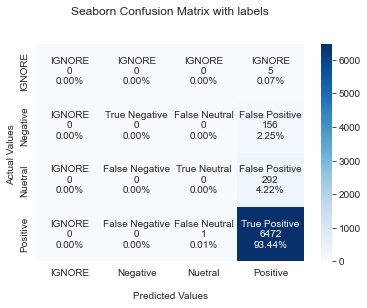

In [194]:
group_names = ['IGNORE','IGNORE','IGNORE','IGNORE','IGNORE','True Negative','False Neutral','False Positive','IGNORE','False Negative','True Neutral','False Positive','IGNORE','False Negative','False Neutral','True Positive']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(4,4)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


ax.xaxis.set_ticklabels(['IGNORE','Negative','Nuetral','Positive'])
ax.yaxis.set_ticklabels(['IGNORE','Negative','Nuetral','Positive'])

plt.show()

In [195]:
#Confusion Matrix of SVC

In [196]:
cmSVC = metrics.confusion_matrix(X_test_targetSentiment, predictedGS_clf_LinearSVC_pipe)
print(cmSVC)

[[   0    0    0    5]
 [   0   39   13  104]
 [   0   14   32  246]
 [   0    5   23 6445]]


In [197]:
#Confusion Matrix Tabulated Graphical Representation of SVC

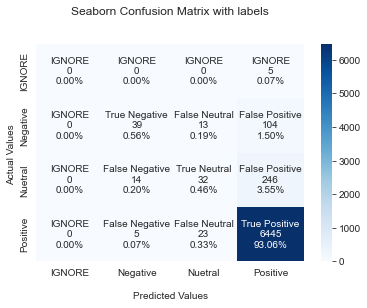

In [198]:
group_names = ['IGNORE','IGNORE','IGNORE','IGNORE','IGNORE','True Negative','False Neutral','False Positive','IGNORE','False Negative','True Neutral','False Positive','IGNORE','False Negative','False Neutral','True Positive']

group_counts = ["{0:0.0f}".format(value) for value in
                cmSVC.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cmSVC.flatten()/np.sum(cmSVC)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(4,4)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


ax.xaxis.set_ticklabels(['IGNORE','Negative','Nuetral','Positive'])
ax.yaxis.set_ticklabels(['IGNORE','Negative','Nuetral','Positive'])

plt.show()

In [199]:
#Confusion Matrix of LogReg

In [200]:
cmLR = metrics.confusion_matrix(X_test_targetSentiment, predictedLogReg)
print(cmLR)

[[   0    0    0    5]
 [   0   31   10  115]
 [   0    6   23  263]
 [   0    4   18 6451]]


In [201]:
#Confusion Matrix Tabulated Graphical Representation of LogReg

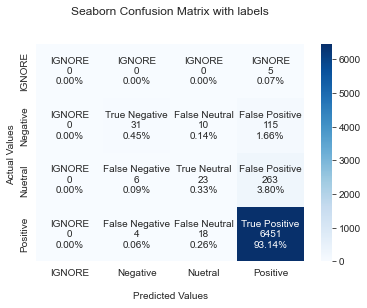

In [202]:
group_names = ['IGNORE','IGNORE','IGNORE','IGNORE','IGNORE','True Negative','False Neutral','False Positive','IGNORE','False Negative','True Neutral','False Positive','IGNORE','False Negative','False Neutral','True Positive']

group_counts = ["{0:0.0f}".format(value) for value in
                cmLR.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cmLR.flatten()/np.sum(cmLR)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(4,4)

ax = sns.heatmap(cmLR, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


ax.xaxis.set_ticklabels(['IGNORE','Negative','Nuetral','Positive'])
ax.yaxis.set_ticklabels(['IGNORE','Negative','Nuetral','Positive'])

plt.show()

In [205]:
inference = "Accuracy wise the Support Vector Machine (SVM) Classifier would be the most optimal classifier for Amazon Product Review Sentiment Analysis."
print(inference)

Accuracy wise the Support Vector Machine (SVM) Classifier would be the most optimal classifier for Amazon Product Review Sentiment Analysis.
